In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, dendrogram
import faiss
from sklearn.cluster import Birch

In [3]:
df = pd.read_csv(r'podaci\clickstream+data+for+online+shopping\e-shop clothing 2008 preprocessed.csv', encoding='cp1252', sep=',')  # dodaj parametar sheet_name= ako ima više listova
print(df.columns)

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'main category', 'clothing model', 'colour', 'location',
       'model photography', 'price', 'price 2', 'page'],
      dtype='object')


In [4]:
df

,year,month,day,order,country,session ID,main category,clothing model,colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


In [5]:
df = df.drop('session ID',axis=1)

In [6]:
df['year'].unique()

array([2008])

In [7]:
#jedina vrijednost kolone year je 2008 pa je brisemo

df = df.drop('year',axis=1)

In [8]:
X = df
X

,month,day,order,country,main category,clothing model,colour,location,model photography,price,price 2,page
0,4,1,1,29,1,4,1,5,1,28,2,1
1,4,1,2,29,1,7,1,6,1,33,2,1
2,4,1,3,29,2,70,10,2,1,52,1,1
3,4,1,4,29,2,51,6,6,2,38,2,1
4,4,1,5,29,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,2,44,2,4,1,67,1,1
165470,8,13,1,9,1,2,3,4,1,62,1,1
165471,8,13,1,34,1,11,3,1,1,43,2,1
165472,8,13,2,34,3,87,12,1,1,43,1,1


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [10]:
scaler = StandardScaler()
X_sca = scaler.fit_transform(X)

In [11]:
def plot_clusters_pca(X, labels, title):
    X = np.array(X)
    if X.ndim == 1:
        raise ValueError("Input data X must be 2D for plotting clusters.")
    if X.shape[1] < 2:
        raise ValueError("Input data X must have at least two features (columns) for 2D plotting.")
    print(title,"Silhouette:", silhouette_score(X, labels) if len(set(labels)) > 1 else "N/A")
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [29]:
def plot_clusters(X, labels, title):
    X = np.array(X)
    if X.ndim == 1:
        raise ValueError("Input data X must be 2D for plotting clusters.")
    if X.shape[1] < 2:
        raise ValueError("Input data X must have at least two features (columns) for 2D plotting.")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    print(title,"Silhouette:", silhouette_score(X_pca, labels) if len(set(labels)) > 1 else "N/A")
    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.grid(True)
    plt.show()

MiniBatch KMeans + PCA Silhouette: 0.6242751984438517


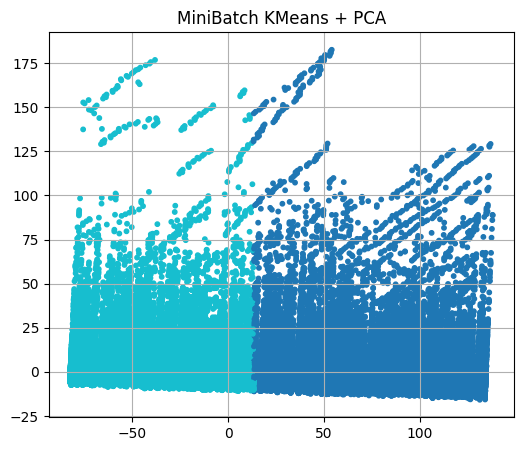

MiniBatch KMeans + PCA Silhouette: 0.5295670331650467


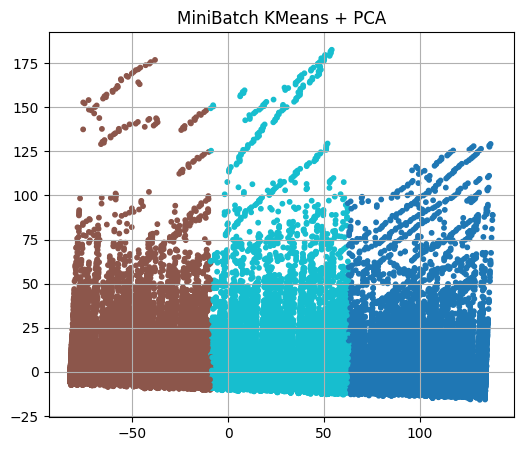

MiniBatch KMeans + PCA Silhouette: 0.49350361322825614


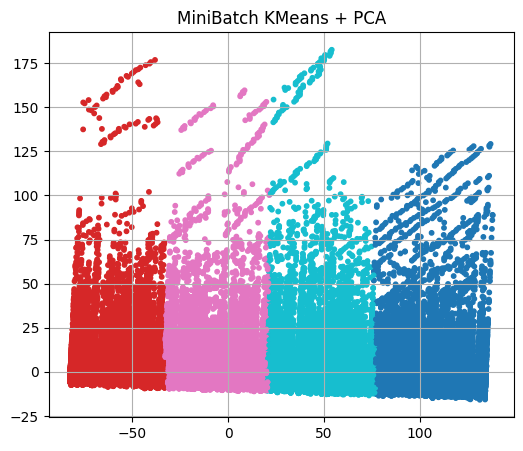

MiniBatch KMeans + PCA Silhouette: 0.4988508484907704


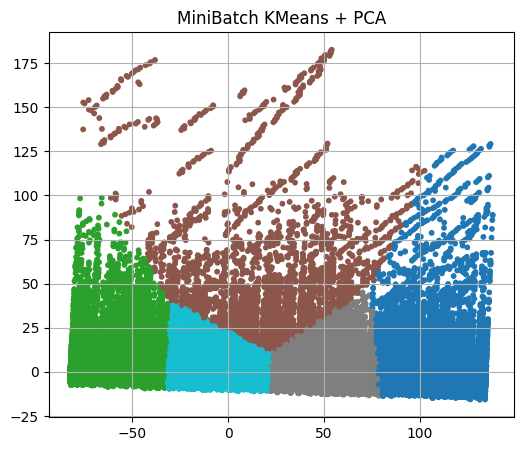

MiniBatch KMeans + PCA Silhouette: 0.44671913377875494


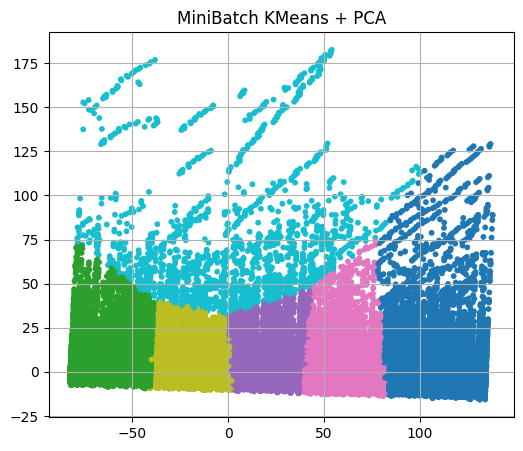

In [11]:
from sklearn.cluster import MiniBatchKMeans
# Najbolji rez na 2 klastera
for i in range(2,7):
    mb_kmeans = MiniBatchKMeans(n_clusters=i, random_state=123)
    
    # mb_kmeans.fit(X)
    # labels_mb = mb_kmeans.labels_
    # plot_clusters(X, labels_mb, 'MiniBatch KMeans')

    mb_kmeans.fit(X_pca)
    labels_mb_pca = mb_kmeans.labels_
    plot_clusters_pca(X_pca, labels_mb_pca, 'MiniBatch KMeans + PCA')
    
    # mb_kmeans.fit(X_sca)
    # labels_mb_sca = mb_kmeans.labels_
    # plot_clusters(X_sca, labels_mb_sca, 'MiniBatch KMeans + SCA')

KMeans++ + PCA Silhouette: 0.6236642350482281


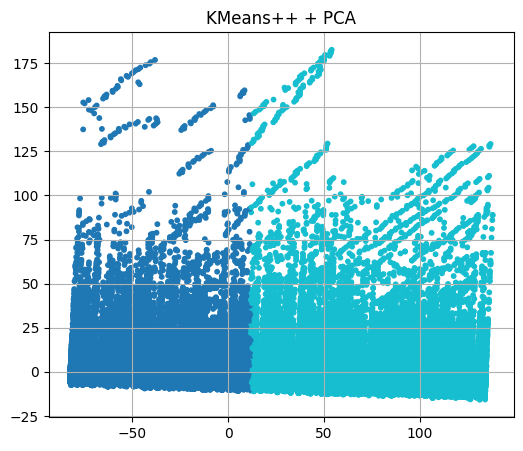

KMeans++ + PCA Silhouette: 0.5023809814185399


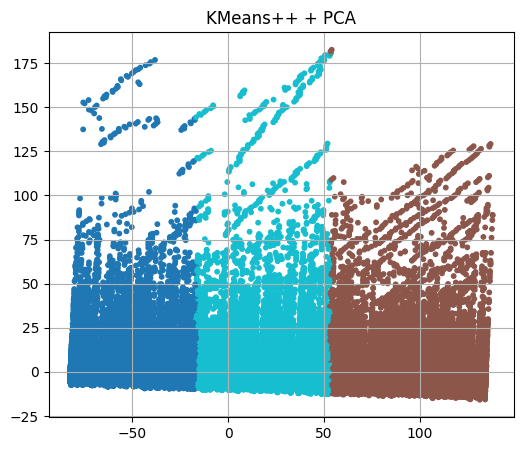

KMeans++ + PCA Silhouette: 0.5011530347790534


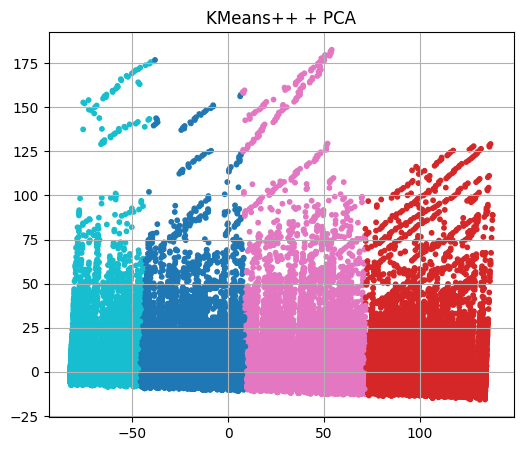

KMeans++ + PCA Silhouette: 0.4891072505074985


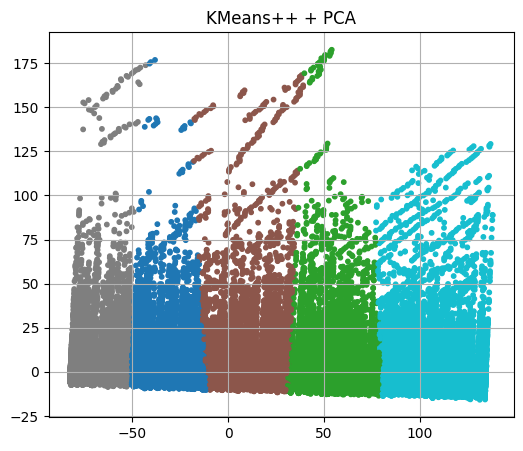

KMeans++ + PCA Silhouette: 0.46267844211995596


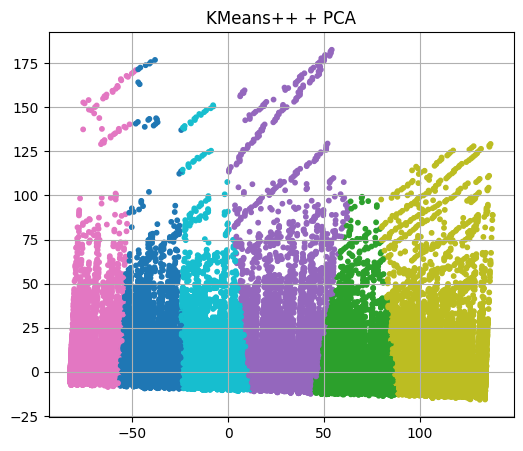

In [20]:
for i in range(2,7):
    kmeans = KMeans(n_clusters=i , init='k-means++', random_state=123)

#     labels_kmeans = kmeans.fit_predict(X)
#     plot_clusters(X, labels_kmeans, 'KMeans++')

    labels_kmeans_pca = kmeans.fit_predict(X_pca)
    plot_clusters_pca(X_pca, labels_kmeans_pca, 'KMeans++ + PCA')

#     labels_kmeans_sca = kmeans.fit_predict(X_sca)
#     plot_clusters(X_sca, labels_kmeans_sca, 'KMeans++ + SCA')

Faiss KMeans + PCA Silhouette: 0.6241175664038935


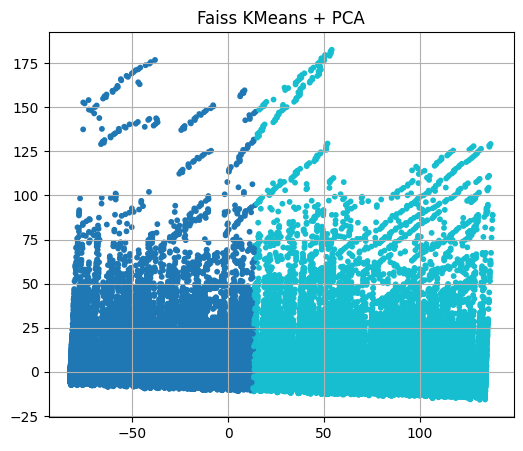

Faiss KMeans + PCA Silhouette: 0.49821667949236886


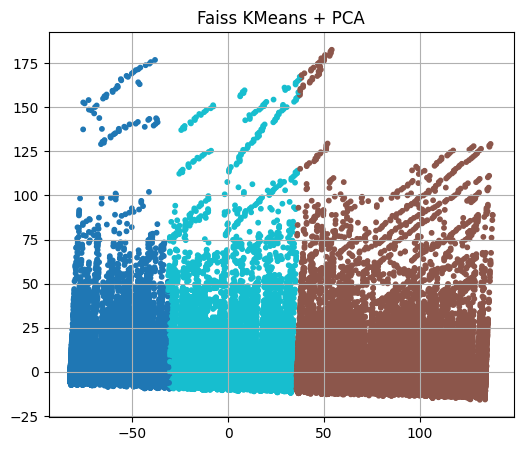

Faiss KMeans + PCA Silhouette: 0.4922150517046573


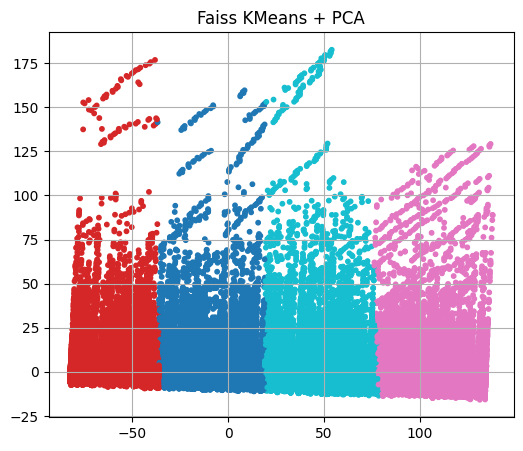

Faiss KMeans + PCA Silhouette: 0.4892570397032541


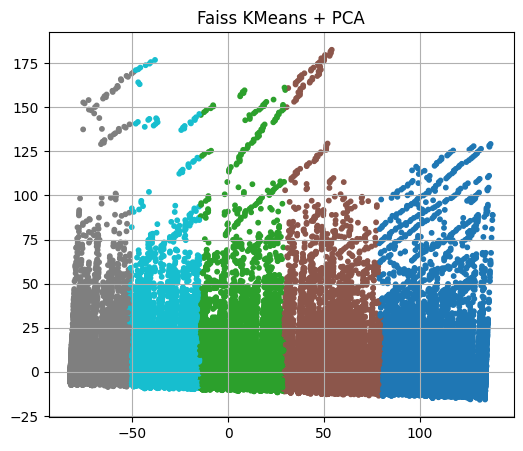

Faiss KMeans + PCA Silhouette: 0.4972255354048669


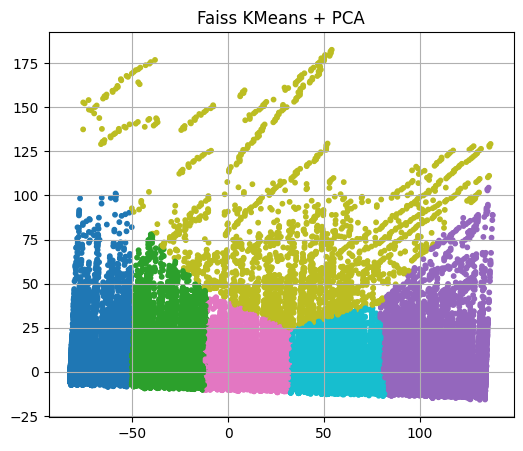

In [21]:
X_faiss = X_pca.astype(np.float32)

for i in range(2,7):
    faiss_kmeans = faiss.Kmeans(d=X_faiss.shape[1], k=i)
    faiss_kmeans.train(X_faiss)

    D, I = faiss_kmeans.index.search(X_faiss, 1)
    labels_faiss = I.flatten()
    plot_clusters_pca(X_pca, labels_faiss, 'Faiss KMeans + PCA')

Birch + PCA Silhouette: 0.5984977870229364


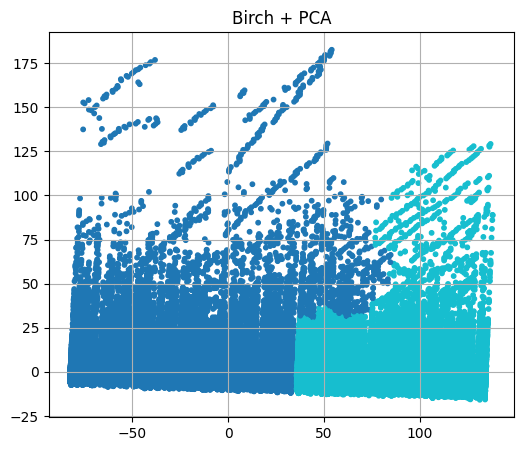

Birch + PCA Silhouette: 0.4985505145120133


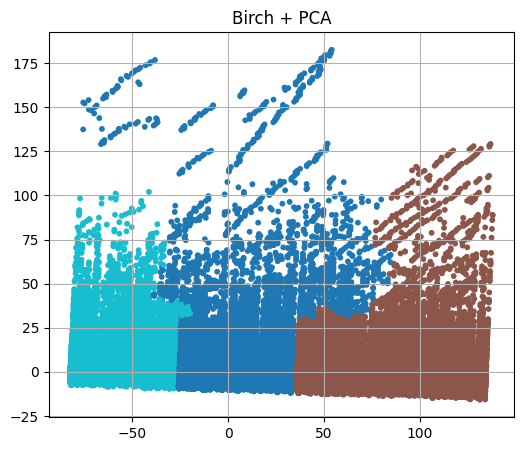

Birch + PCA Silhouette: 0.499172841345677


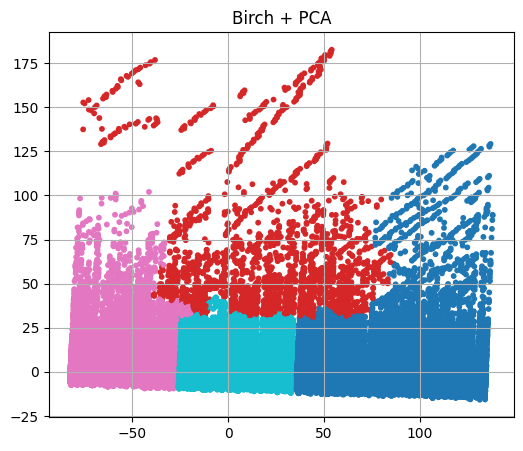

Birch + PCA Silhouette: 0.4885895053603719


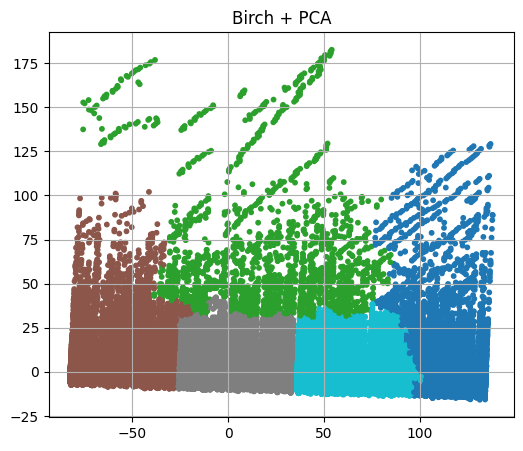

Birch + PCA Silhouette: 0.4877205611007164


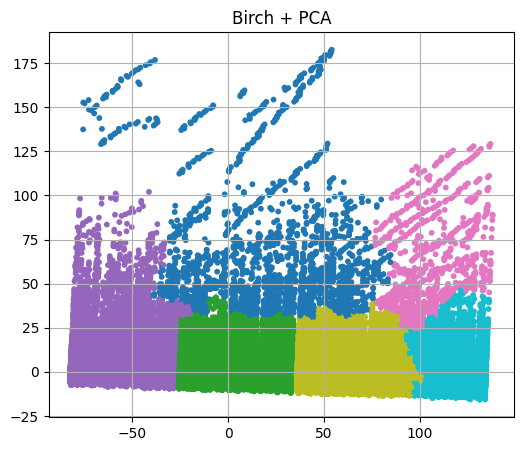

In [25]:
for i in range(2,7):
    birch = Birch(n_clusters=i)

    # birch.fit(X)
    # labels_birch = birch.labels_
    # plot_clusters(X, labels_birch, 'Birch')

    birch.fit(X_pca)
    labels_birch_pca = birch.labels_
    plot_clusters_pca(X_pca, labels_birch_pca, 'Birch + PCA')

#     labels_kmeans_sca = kmeans.fit_predict(X_sca)
#     plot_clusters(X_sca, labels_kmeans_sca, 'Birch + SCA')

In [27]:
X_sample_X = resample(X, n_samples=20000, random_state=123)
X_sample = resample(X_pca, n_samples=20000, random_state=123)
X_sample_sca = resample(X_sca, n_samples=20000, random_state=123)

AGG + Sample of pca (20 000) Silhouette: 0.6223676965889967


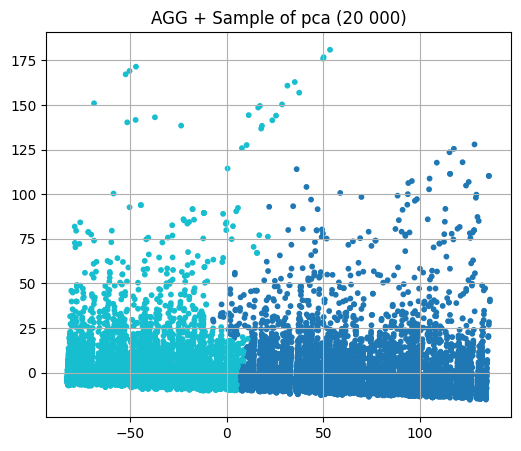

AGG + Sample of pca (20 000) Silhouette: 0.5478449659930595


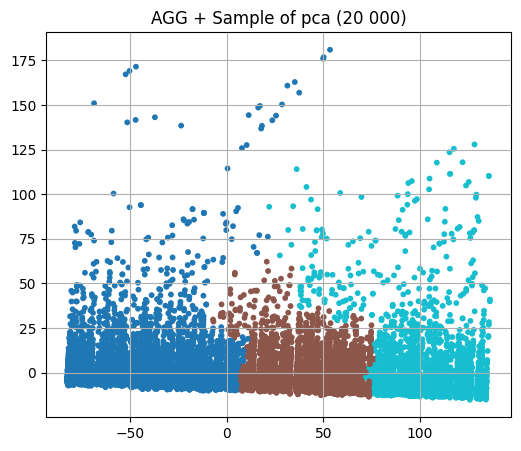

AGG + Sample of pca (20 000) Silhouette: 0.44298504136269173


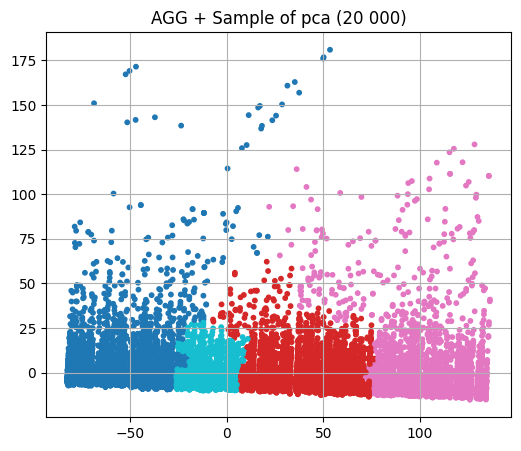

AGG + Sample of pca (20 000) Silhouette: 0.45078092392837416


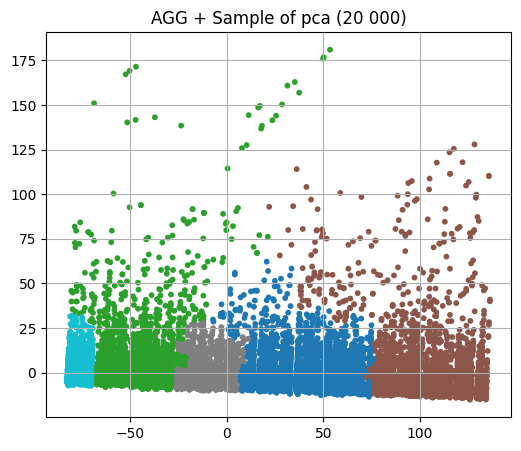

AGG + Sample of pca (20 000) Silhouette: 0.42866852411891976


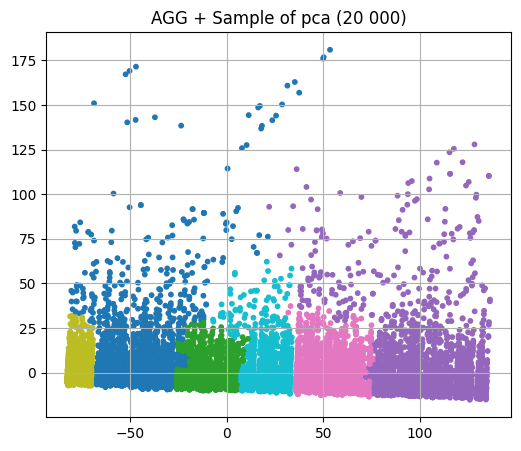

In [15]:
for i in range(2,7):

    agg = AgglomerativeClustering(n_clusters=i)
    labels_agg = agg.fit_predict(X_sample)

    plot_clusters_pca(X_sample,labels_agg,'AGG + Sample of pca (20 000)')

Spectral Clustering Silhouette: 0.6236832904342545


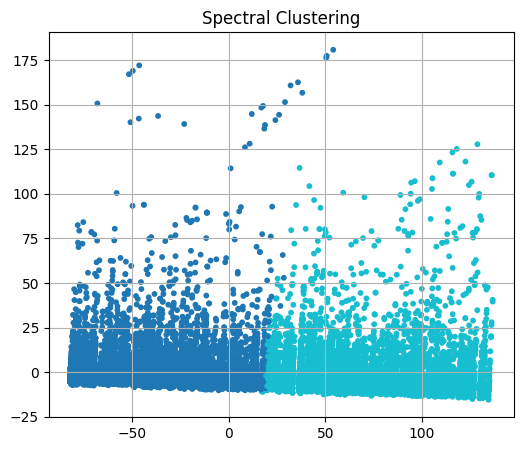

Spectral Clustering Silhouette: 0.19801304413791382


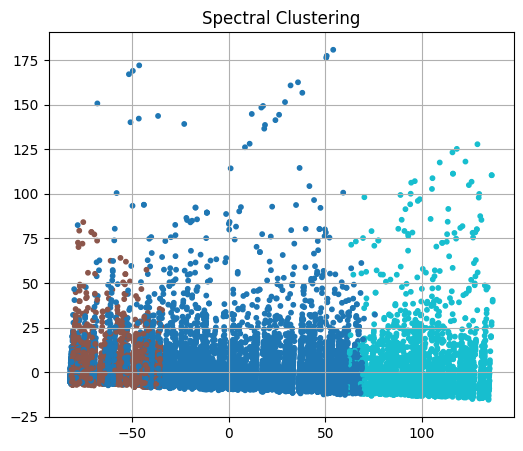

Spectral Clustering Silhouette: 0.23007058079662884


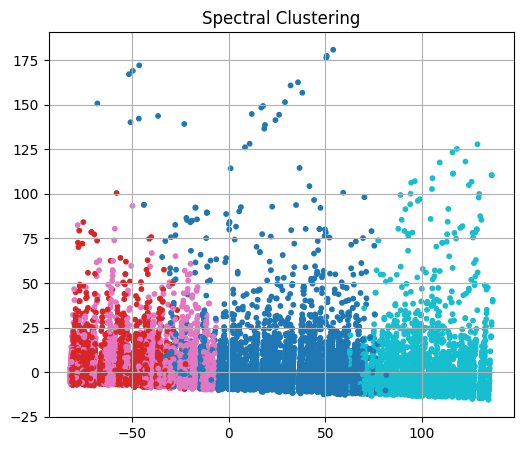

Spectral Clustering Silhouette: 0.3170219689523194


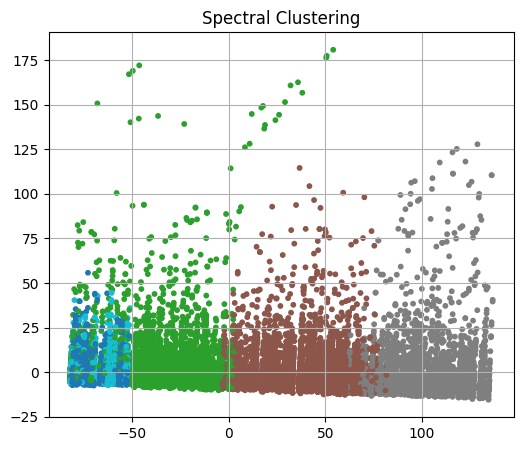

Spectral Clustering Silhouette: 0.1868784531293589


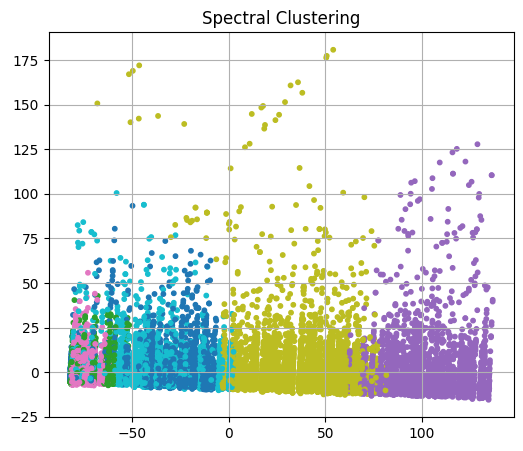

In [30]:
from sklearn.cluster import SpectralClustering

for i in range(2,7):
    spectral = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=123)

    labels_spectral = spectral.fit_predict(X_sample_X)
    plot_clusters(X_sample_X, labels_spectral, 'Spectral Clustering')


#Losi rezultati
    # labels_spectral_pca = spectral.fit_predict(X_sample)
    # plot_clusters_pca(X_sample, labels_spectral_pca, 'Spectral Clustering + PCA Sample (20 000)')

    # labels_spectral_sca = spectral.fit_predict(X_sample_sca)
    # plot_clusters_pca(X_sample_sca, labels_spectral_sca, 'Spectral Clustering + SCA Sample (20 000)')

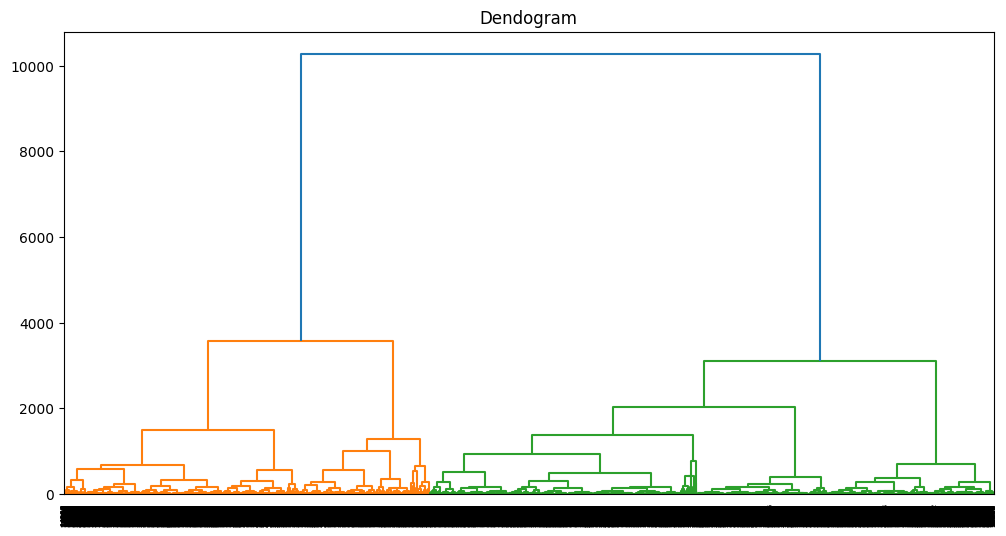

In [22]:
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendogram')
plt.show()

Asocijativna analiza

In [59]:
# from mlxtend.frequent_patterns import apriori, association_rules
# from mlxtend.preprocessing import TransactionEncoder

In [60]:
# df

Grupisemo po sesijama

In [61]:
# transactions = df.groupby("session ID")["page 1 (main category)"].apply(list).tolist()

In [62]:
# te = TransactionEncoder()
# te_array = te.fit(transactions).transform(transactions)

# df_encoded = pd.DataFrame(te_array, columns=te.columns_)
# df_encoded

In [63]:
# frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# rules

In [64]:
# frequent_itemsets